<a href="https://colab.research.google.com/github/Sharminrahi/Deep-Learning/blob/main/Assignment_2_Q1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1
**The CIFAR-10 dataset consists of a total of 60,000 colour images of dimensions $32\times32$ with a total of 10 classes. There are 50,000 training images and 10,000 test images. Develop a feedforward neural network (i.e. a MLP) for image classi cation for this dataset. Experiment with the number of hidden layers, units per layer, activation functions, etc. Verify the model(s) by reporting suitable metrics, such as accuracy, precision, recall, per-class accuracy, etc. What overall accuracy can your model obtain for this dataset?
Visualize some of the correct and incorrect predictions of your model.**

# Part 1
Develop a feedforward neural network (i.e. MLP) for image classification for this dataset.

**A feedforward neural network are also called as multilayered network of neurons used for supervised learning in cases where the data to be learned is neither sequential nor time-dependent. Every unit in a layer is connected with all the units in the previous layer.**

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Using tensor flow Keras API

# Import Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Step 1
Load the CIFAR-10 dataset

In [ ]:
cifar_10 = tf.keras.datasets.cifar10
cifar_10

<module 'keras.api._v2.keras.datasets.cifar10' from '/usr/local/lib/python3.8/dist-packages/keras/api/_v2/keras/datasets/cifar10/__init__.py'>

# Step 2
Building traning/testing pipelines

In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar_10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


We can see that there are 50,000 examples in the training dataset and 10,000 in the test dataset and that images are indeed square with 32×32 pixels and color, with three channels i.e. images are color images. As well as it is also visible that there is only a single label assigned with each image.

# Step 3: Process the Data
We need to process the data in order to send it to the network which includes:

1. Reduce the pixel values (range between 0 and 1)
2. We can do this simply dividing all pixel values by 255
3. We can also do flatten(rearrange them in form of row)


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize to range from 0 to 1

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

# Flatten the image

In [ ]:
Y_train = Y_train.flatten()
Y_tets = Y_test.flatten()

In [ ]:
Y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
Y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

# Plot first few images

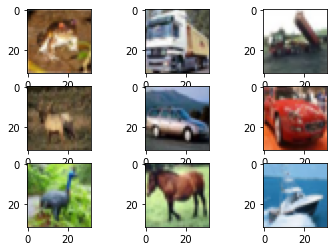

In [ ]:
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(X_train[i])
# show the figure
plt.show()

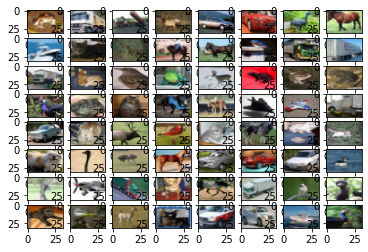

In [ ]:
# visualize data by plotting images
fig, ax = plt.subplots(8, 8)
k = 0
 
for i in range(8):
    for j in range(8):
        ax[i][j].imshow(X_train[k], aspect='auto')
        k += 1
 
plt.show()

# Step 4: Create the model

In [ ]:
inp = tf.keras.layers.Input(shape=(32,32,3))
b = tf.keras.layers.Flatten()(inp)
b = tf.keras.layers.Dense(512, activation='relu')(b)
b = tf.keras.layers.Dense(256, activation='relu')(b)
out = tf.keras.layers.Dense(10, activation='softmax')(b)

model = tf.keras.models.Model(inp, out)

In [ ]:
# Summary of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


# Step 5: # Compile the model(loss function and the chosen variant of GD)

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

# Step 6: Train the model

In [ ]:
hist = model.fit(
    X_train, Y_train,
    epochs=100,
    validation_data=(X_test, Y_test),
    callbacks = tf.keras.callbacks.EarlyStopping(patience=2)
)

Epoch 1/100
1563/1563 [==============================] - 41s 26ms/step - loss: 1.8514 - accuracy: 0.3311 - val_loss: 1.7298 - val_accuracy: 0.3739
Epoch 2/100
1563/1563 [==============================] - 39s 25ms/step - loss: 1.6727 - accuracy: 0.4003 - val_loss: 1.5908 - val_accuracy: 0.4301
Epoch 3/100
1563/1563 [==============================] - 40s 25ms/step - loss: 1.5960 - accuracy: 0.4275 - val_loss: 1.5978 - val_accuracy: 0.4233
Epoch 4/100
1563/1563 [==============================] - 40s 26ms/step - loss: 1.5427 - accuracy: 0.4487 - val_loss: 1.5292 - val_accuracy: 0.4506
Epoch 5/100
1563/1563 [==============================] - 39s 25ms/step - loss: 1.5083 - accuracy: 0.4617 - val_loss: 1.5331 - val_accuracy: 0.4481
Epoch 6/100
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4785 - accuracy: 0.4715 - val_loss: 1.4841 - val_accuracy: 0.4687
Epoch 7/100
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4506 - accuracy: 0.4785 - val_loss: 1

# Add Data Auggmation to train the model again

In [ ]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
 
train_generator = data_generator.flow(X_train, Y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
 
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
r = model.fit(train_generator, validation_data = (X_test, Y_test),
              steps_per_epoch = steps_per_epoch, epochs = 50, callbacks=[callback])

#r = model.fit(train_generator, validation_data = (X_test, Y_test),
              #steps_per_epoch = steps_per_epoch, epochs = 50)

Epoch 1/50
1562/1562 [==============================] - 63s 40ms/step - loss: 1.5424 - accuracy: 0.4486 - val_loss: 1.4697 - val_accuracy: 0.4747
Epoch 2/50
1562/1562 [==============================] - 60s 38ms/step - loss: 1.5285 - accuracy: 0.4515 - val_loss: 1.4614 - val_accuracy: 0.4788
Epoch 3/50
1562/1562 [==============================] - 61s 39ms/step - loss: 1.5123 - accuracy: 0.4551 - val_loss: 1.4297 - val_accuracy: 0.4908
Epoch 4/50
1562/1562 [==============================] - 62s 40ms/step - loss: 1.5129 - accuracy: 0.4568 - val_loss: 1.5036 - val_accuracy: 0.4731
Epoch 5/50
1562/1562 [==============================] - 61s 39ms/step - loss: 1.5028 - accuracy: 0.4608 - val_loss: 1.4092 - val_accuracy: 0.4997
Epoch 6/50
1562/1562 [==============================] - 61s 39ms/step - loss: 1.4987 - accuracy: 0.4633 - val_loss: 1.4528 - val_accuracy: 0.4742
Epoch 7/50
1562/1562 [==============================] - 61s 39ms/step - loss: 1.4846 - accuracy: 0.4686 - val_loss: 1.4256 -

# Plot the training progress

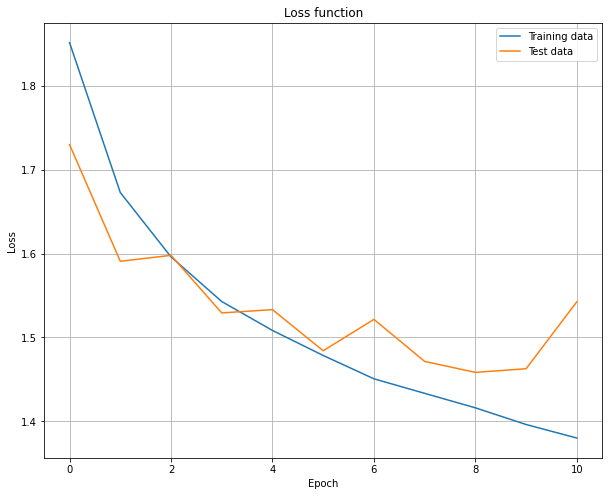

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Test data'])
plt.show()


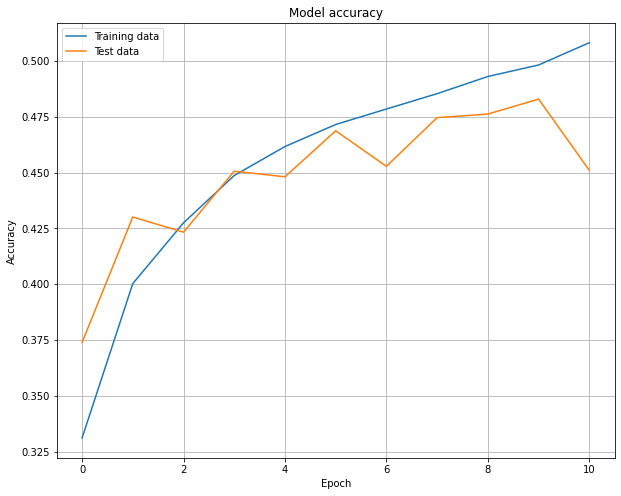

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Test data'])

# Step 7: Evaluate the model

In [ ]:
loss_accuracy = model.evaluate(X_test, Y_test, verbose = 0)

print("Test Loss: {}".format(loss_accuracy[0]))
print("Test Accuracy: {}".format(loss_accuracy[1]))

Test Loss: 1.4679094552993774
Test Accuracy: 0.47850000858306885


# Part (b)
Verify the model(s) by reporting suitable metrics, such as accuracy, precision, recall, per-class accuracy, etc. 
Visualize some of the correct and incorrect predictions of your model.

# To calculate precision, recall, and per-class accuracy, we can use the classification_report and confusion_matrix from scikit-learn library.



In [ ]:
# Predict the classes on the test set
y_pred = model.predict(X_test).argmax(axis=1)
y_true = Y_test.argmax(axis=1)

# Calculate precision, recall, and per-class accuracy
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_true, y_pred));

313/313 [==============================] - 5s 13ms/step
              precision    recall  f1-score   support

           0       1.00      0.08      0.16     10000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.08     10000
   macro avg       0.10      0.01      0.02     10000
weighted avg       1.00      0.08      0.16     10000

Confusion Matrix: 
 [[ 847 1466  290 1336 1035 1115  847 1356 1031  677]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Part (C)
What overall accuracy can your model obtain for this dataset?

In [ ]:
# Reshape Y_train and Y_test to 2D arrays
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

# Concatenate the training and test sets
X_total = np.concatenate((X_train, X_test))
Y_total = np.concatenate((Y_train, Y_test))

# Evaluate the model on the entire dataset
_, overall_accuracy = model.evaluate(X_total, Y_total)

print("Overall Accuracy: {:.4f}".format(overall_accuracy))


1875/1875 [==============================] - 14s 8ms/step - loss: 1.4045 - accuracy: 0.4959
Overall Accuracy: 0.4959


# Part(d)
Visualize some of the correct and incorrect predictions of your model.

In [ ]:
def visualize_predictions(model, X_test, Y_test):
    # Get predictions for all examples
    Y_pred = model.predict(X_test)
    # Round the predicted labels to 0 or 1
    Y_pred = np.round(Y_pred)
    # Convert one-hot encoding to class labels
    Y_pred = np.argmax(Y_pred, axis=1)
    Y_true = np.argmax(Y, axis=1)
    
    # Select a random subset of the data
    n_examples = 12
    random_idx = np.random.randint(0, X.shape[0], n_examples)
    X = X[random_idx]
    Y_pred = Y_pred[random_idx]
    Y_true = Y_true[random_idx]
    
    # Plot the results
    fig1, axs = plt.subplots(3, 4, figsize=(12, 9))
    plt.show()

    for i in range(n_examples):
        ax = axs[i // 4, i % 4]
        ax.imshow(X[i])
        title = "True: {}, Pred: {}".format(Y_true[i], Y_pred[i])
        if Y_true[i] == Y_pred[i]:
            title += "\nCorrect"
        else:
            title += "\nIncorrect"
            ax.set_title(title)
            ax.axis('off')   
plt.show()

In [ ]:
# checking the correct and incorrect predictions
correct_indices = np.nonzero(y_pred == Y_test)[0]
incorrect_indices = np.nonzero(y_pred != Y_test)[0]
print(len(correct_indices), "classified correctly")
print(len(incorrect_indices), "classified incorrectly")

10000000 classified correctly
90000000 classified incorrectly


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_predictions(model, X_test, Y_test):
    # Get predictions for all examples
    Y_pred = model.predict(X_test)
    # Round the predicted labels to 0 or 1
    Y_pred = np.round(Y_pred)
    # Convert one-hot encoding to class labels
    Y_pred = np.argmax(Y_pred, axis=1)
    Y_true = np.argmax(Y_test, axis=1)

    # Select a random subset of the data
    n_examples = 12
    random_idx = np.random.randint(0, X_test.shape[0], n_examples)
    X = X_test[random_idx]
    Y_pred = Y_pred[random_idx]
    Y_true = Y_true[random_idx]

    # Plot the results
    fig1, axs = plt.subplots(3, 4, figsize=(12, 9))

    for i in range(n_examples):
        ax = axs[i // 4, i % 4]
        ax.imshow(X[i])
        title = "True: {}, Pred: {}".format(Y_true[i], Y_pred[i])
        if Y_true[i] == Y_pred[i]:
            title += "\nCorrect"
        else:
            title += "\nIncorrect"
        ax.set_title(title)
        ax.axis('off')
    plt.show()


313/313 [==============================] - 3s 9ms/step


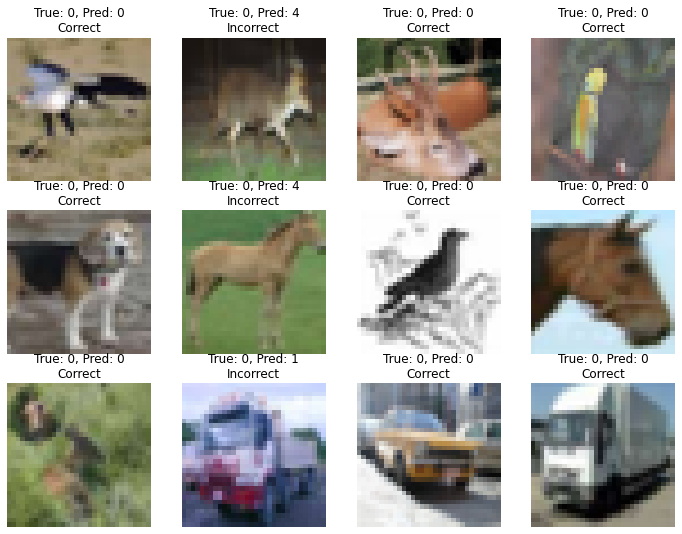

In [ ]:
# Assume you have a trained model named 'my_model'
# and test data 'X_test' and 'Y_test'
visualize_predictions(model, X_test, Y_test)
